In [1]:
#!user/bin/env python
# -*- coding:utf-8 -*-

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [3]:
data = load_digits()
x = data.data
y = data.target
x = data.data[(y==8)|(y==5)]
y = data.target[(y==8)|(y==5)]


In [4]:
pca  = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [5]:
from sklearn.preprocessing import MinMaxScaler
x_pca_scaler = MinMaxScaler().fit_transform(x_pca)

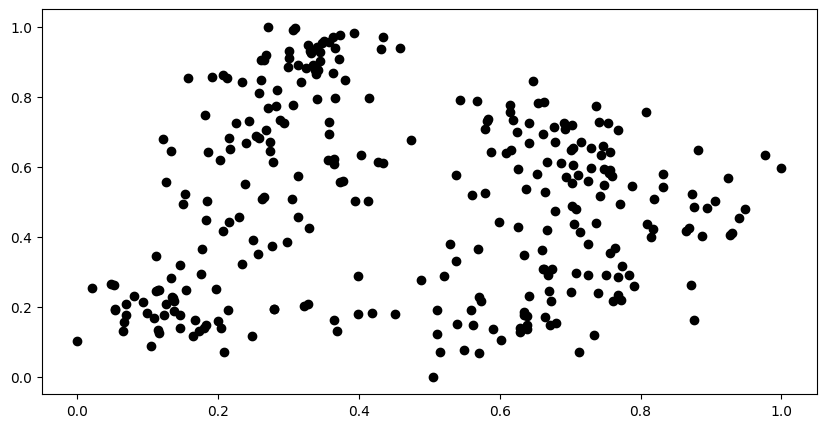

In [6]:
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(1, 1, 1)
for i in range(300):
    ax1.scatter(x_pca_scaler[i,0],x_pca_scaler[i,1],c='k')
plt.show()

In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [8]:
#加载数据并筛选数字3和数字9
data = load_digits()
x = data.data
y = data.target
x = data.data[(y==3)|(y==9)]
y = data.target[(y==3)|(y==9)]

In [9]:
#PCA
pca  = PCA(n_components=2)
x = pca.fit_transform(x)

In [10]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [11]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
np.random.seed(0)
x_sub_index = np.random.choice(range(len(x)),20,replace=False)
x_sub = x[x_sub_index]
y_sub = y[x_sub_index]
lr.fit(x_sub,y_sub)
lr.score(x,y)

0.8402203856749312

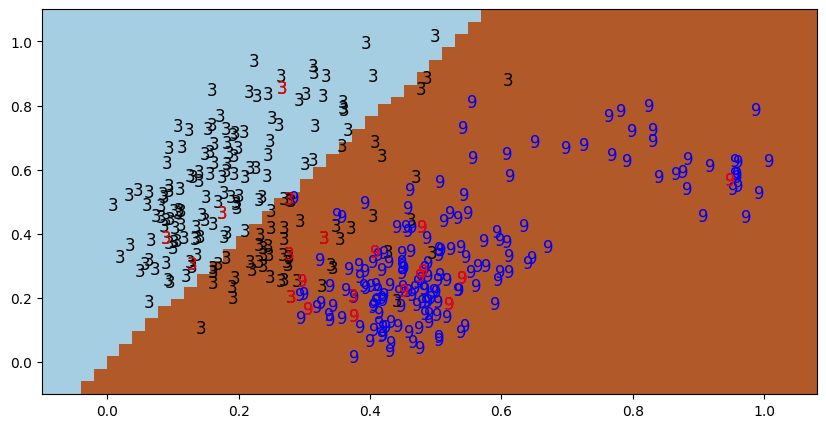

In [12]:
#绘制决策边界
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(1, 1, 1)
for i in range(len(x)):
    if y[i]==3:
        ax1.text(x[i,0],x[i,1],str(y[i]),color='k',
            fontdict={'size': 12})
    if y[i]==9:
        ax1.text(x[i,0],x[i,1],str(y[i]),color='b',
            fontdict={'size': 12})
    
for k in range(len(x_sub)):
    ax1.text(x_sub[k,0],x_sub[k,1],str(y_sub[k]),color='r',
            fontdict={'size': 12}) 
    
h=0.02    
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.imshow(
    z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)
plt.show()

In [13]:
#选取n个预测可能性最小的数据
n=2
proba = lr.predict_proba(x)
hand_x = x[np.argsort(np.max(proba,axis=1))[0:n]]
hand_y = y[np.argsort(np.max(proba,axis=1))[0:n]]
x_sub1 = np.concatenate([x_sub,hand_x])
y_sub1 = np.concatenate([y_sub,hand_y])

In [14]:
#逻辑回归
lr1 =  LogisticRegression()
lr1.fit(x_sub1,y_sub1)
lr1.score(x,y)

0.9504132231404959

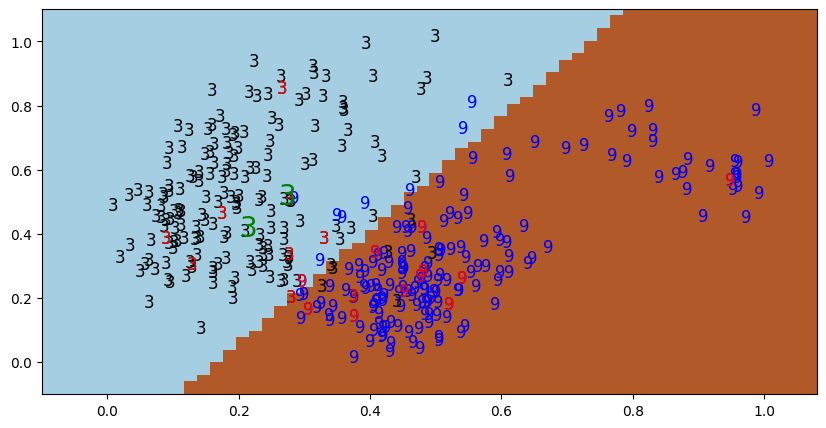

In [15]:
#决策边界
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(1, 1, 1)
for i in range(len(x)):
    if y[i]==3:
        ax1.text(x[i,0],x[i,1],str(y[i]),color='k',
            fontdict={'size': 12})
    if y[i]==9:
        ax1.text(x[i,0],x[i,1],str(y[i]),color='b',
            fontdict={'size': 12})
    
for k in range(len(x_sub)):
    ax1.text(x_sub[k,0],x_sub[k,1],str(y_sub[k]),color='r',
            fontdict={'size': 12})

for j in range(len(hand_x[0:n])):
    ax1.text(hand_x [0:n][j,0],hand_x [0:n][j,1],str(hand_y[0:n][j]),color='g',
            fontdict={'size': 20})    
    
h=0.02    
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
z = lr1.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.imshow(
    z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)
plt.show()